In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geoplot as gplt
import geopandas as gp
import geoplot.crs as gcrs
# converts coordinate pairs into points that can be interpreted by geopandas
from shapely.geometry import Point

In [3]:
# reading the shapefile
sftracts = gp.read_file("/Users/daviderickson/projects/datasf/data/Analysis Neighborhoods - 2010 census tracts assigned to neighborhoods/geo_export_729f30ed-0972-44ec-b06d-34a8c3d7abe2.dbf")

# setting the census tract ID as index will make map creation easier later on!
sftracts.set_index("tractce10", inplace=True)

sftracts.head()

,geoid,nhood,shape_area,shape_len,geometry
tractce10,,,,,
016400,06075016400,Hayes Valley,3.326589e+06,7589.679396,POLYGON ((-122.4324669997095 37.77375700028448...
016100,06075016100,Western Addition,3.970259e+06,8525.808755,POLYGON ((-122.4235409996432 37.77967400025458...
015900,06075015900,Western Addition,3.179072e+06,8000.966619,POLYGON ((-122.4246870001921 37.78533500040309...
015500,06075015500,Japantown,3.364565e+06,12144.016761,POLYGON ((-122.4246870001921 37.78533500040309...
015300,06075015300,Pacific Heights,2.515363e+06,6918.268026,POLYGON ((-122.4349179998128 37.78587599994257...


In [4]:
df = pd.read_csv('/Users/daviderickson/projects/datasf/data/Assessor_Historical_Secured_Property_Tax_Rolls.csv')

/Users/daviderickson/anaconda3/envs/property_tax_rolls/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.columns[25]

'Percent of Ownership'

In [6]:
df.shape

(2238147, 43)

In [7]:
df.head(5)

,Closed Roll Year,Property Location,Parcel Number,Block,Lot,Volume Number,Use Code,Use Definition,Property Class Code,Property Class Code Definition,...,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,Assessor Neighborhood District,Assessor Neighborhood Code,Assessor Neighborhood,Supervisor District,Analysis Neighborhood,the_geom,Row ID
0,2007.0,0000 0200 BRANNAN ST0436,3774412,3774,412,25,SRES,Single Family Residential,Z,Condominium,...,660074.0,660074.0,0.0,9.0,9H,South Beach,6,Financial District/South Beach,"(37.783600301443, -122.390711686202)",200701013774412
1,2016.0,0000 1207 INDIANA ST0004,4228041,4228,041,27,SRES,Single Family Residential,Z,Condominium,...,448902.0,448902.0,0.0,9.0,9E,Potrero Hill,10,Potrero Hill,"(37.75482032723, -122.390407823087)",201601014228041
2,2010.0,0000 0383 SITUS TO BE ASSIGNEDST0000,0041102,0041,102,1,COMR,Commercial Retail,C,Commercial Stores,...,643682.0,1396687.0,0.0,8.0,8D,North Beach,3,North Beach,"(37.805391366593, -122.413327689424)",201001010041102
3,2007.0,0000 0708 NORTH POINT STT 1,0024038,0024,038,1,SRES,Single Family Residential,Z,Condominium,...,365523.0,365523.0,0.0,8.0,8E,Russian Hill,2,Russian Hill,"(37.806098058572, -122.419076819471)",200701010024038
4,2016.0,0000 0188 MARY TERESA ST0000,5054A152,5054A,152,30,SRES,Single Family Residential,D,Dwelling,...,255843.0,383764.0,0.0,10.0,10K,Bayview Heights,10,Bayview Hunters Point,"(37.713888461234, -122.399170485325)",201601015054A152


In [8]:
df.describe()

,Closed Roll Year,Volume Number,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,Number of Units,Lot Depth,Lot Frontage,...,Tax Rate Area Code,Percent of Ownership,Misc Exemption Value,Homeowner Exemption Value,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,Assessor Neighborhood District,Supervisor District
count,2.238146e+06,2.238147e+06,2.064000e+06,2.238147e+06,2.238147e+06,2.238147e+06,2.238147e+06,2.238147e+06,2.238147e+06,2.238147e+06,...,2.232637e+06,2.238146e+06,2.238146e+06,2.238146e+06,2.238146e+06,2.238146e+06,2.238146e+06,2.238146e+06,2.237865e+06,2.238147e+06
mean,2.012061e+03,2.063252e+01,1.941636e+03,2.364135e+00,1.048956e+00,7.823049e+00,1.470800e+00,1.835442e+00,8.669454e+00,6.056058e-02,...,1.000725e+03,9.190668e-01,2.915795e+04,3.157840e+03,7.209944e+03,4.023147e+05,3.994016e+05,3.392403e+03,6.070209e+00,6.121937e+00
std,3.164951e+00,1.288068e+01,5.587058e+01,8.784859e+00,1.069431e+01,2.376514e+01,6.567046e+00,1.532557e+01,2.180097e+01,1.662870e+00,...,1.800430e+01,1.354783e+01,1.401633e+06,4.041963e+03,7.834920e+05,3.913785e+06,2.269509e+06,2.827261e+05,3.124298e+00,3.129490e+00
min,2.007000e+03,1.000000e+00,1.024000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.009000e+03,9.000000e+00,1.914000e+03,1.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.072400e+04,5.093500e+04,0.000000e+00,3.000000e+00,3.000000e+00
50%,2.012000e+03,1.900000e+01,1.935000e+03,1.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.867150e+05,1.966560e+05,0.000000e+00,7.000000e+00,6.000000e+00
75%,2.015000e+03,3.200000e+01,1.962000e+03,2.000000e+00,2.000000e+00,8.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+03,1.000000e+00,0.000000e+00,7.000000e+03,0.000000e+00,3.332948e+05,4.119580e+05,0.000000e+00,9.000000e+00,9.000000e+00
max,2.017000e+03,4.400000e+01,9.185000e+03,1.002000e+03,3.800000e+03,3.606000e+03,9.990000e+02,4.000000e+03,9.996000e+01,9.939000e+01,...,9.000000e+03,6.005000e+03,7.056831e+08,7.770000e+05,6.084663e+08,7.035785e+08,5.835724e+08,1.401327e+08,1.000000e+01,1.100000e+01


In [9]:
df.columns

Index(['Closed Roll Year', 'Property Location', 'Parcel Number', 'Block',
       'Lot', 'Volume Number', 'Use Code', 'Use Definition',
       'Property Class Code', 'Property Class Code Definition',
       'Year Property Built', 'Number of Bathrooms', 'Number of Bedrooms',
       'Number of Rooms', 'Number of Stories', 'Number of Units',
       'Zoning Code', 'Construction Type', 'Lot Depth', 'Lot Frontage',
       'Property Area', 'Basement Area', 'Lot Area', 'Lot Code',
       'Tax Rate Area Code', 'Percent of Ownership', 'Exemption Code',
       'Exemption Code Definition', 'Status Code', 'Misc Exemption Value',
       'Homeowner Exemption Value', 'Current Sales Date',
       'Assessed Fixtures Value', 'Assessed Improvement Value',
       'Assessed Land Value', 'Assessed Personal Property Value',
       'Assessor Neighborhood District', 'Assessor Neighborhood Code',
       'Assessor Neighborhood', 'Supervisor District', 'Analysis Neighborhood',
       'the_geom', 'Row ID'],
      dt

In [10]:
# Create two lists for the loop results to be placed
lat = []
lon = []

# For each row in a varible,
for row in df['the_geom']:
    # Try to,
    try:
        # Split the row by comma, convert to float, and append
        # everything before the comma to lat
        lon.append(float(row.split(',')[0].split('(')[1]))
        # Split the row by comma, convert to float, and append
        # everything after the comma to lon
        lat.append(float(row.split(',')[1].split(')')[0]))
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

# Create two new columns from lat and lon
df['latitude'] = lat
df['longitude'] = lon

In [11]:
# convert coords to points
df["Coordinates"] = (df[["latitude", "longitude"]]
                               .apply(tuple, axis=1)
                               .apply(Point)
                              ) 
# convert dataframe to geodataframe
df = gp.GeoDataFrame(df, geometry="Coordinates")

In [12]:
df.head()

,Closed Roll Year,Property Location,Parcel Number,Block,Lot,Volume Number,Use Code,Use Definition,Property Class Code,Property Class Code Definition,...,Assessor Neighborhood District,Assessor Neighborhood Code,Assessor Neighborhood,Supervisor District,Analysis Neighborhood,the_geom,Row ID,latitude,longitude,Coordinates
0,2007.0,0000 0200 BRANNAN ST0436,3774412,3774,412,25,SRES,Single Family Residential,Z,Condominium,...,9.0,9H,South Beach,6,Financial District/South Beach,"(37.783600301443, -122.390711686202)",200701013774412,-122.390712,37.783600,POINT (-122.390711686202 37.783600301443)
1,2016.0,0000 1207 INDIANA ST0004,4228041,4228,041,27,SRES,Single Family Residential,Z,Condominium,...,9.0,9E,Potrero Hill,10,Potrero Hill,"(37.75482032723, -122.390407823087)",201601014228041,-122.390408,37.754820,POINT (-122.390407823087 37.75482032723)
2,2010.0,0000 0383 SITUS TO BE ASSIGNEDST0000,0041102,0041,102,1,COMR,Commercial Retail,C,Commercial Stores,...,8.0,8D,North Beach,3,North Beach,"(37.805391366593, -122.413327689424)",201001010041102,-122.413328,37.805391,POINT (-122.413327689424 37.805391366593)
3,2007.0,0000 0708 NORTH POINT STT 1,0024038,0024,038,1,SRES,Single Family Residential,Z,Condominium,...,8.0,8E,Russian Hill,2,Russian Hill,"(37.806098058572, -122.419076819471)",200701010024038,-122.419077,37.806098,POINT (-122.419076819471 37.806098058572)
4,2016.0,0000 0188 MARY TERESA ST0000,5054A152,5054A,152,30,SRES,Single Family Residential,D,Dwelling,...,10.0,10K,Bayview Heights,10,Bayview Hunters Point,"(37.713888461234, -122.399170485325)",201601015054A152,-122.399170,37.713888,POINT (-122.399170485325 37.713888461234)


In [13]:
# 
df.crs = sftracts.crs # Making sure the map projections of both geodataframes are the same
df_joined = gp.sjoin(df, sftracts) # joining the geodataframes on its spatial geometries
df_joined.rename(columns={"index_right":"tractce10"}, inplace=True)
df_joined.iloc[:,::-1].head()
df_joined.head()



,Closed Roll Year,Property Location,Parcel Number,Block,Lot,Volume Number,Use Code,Use Definition,Property Class Code,Property Class Code Definition,...,the_geom,Row ID,latitude,longitude,Coordinates,tractce10,geoid,nhood,shape_area,shape_len
0,2007.0,0000 0200 BRANNAN ST0436,3774412,3774,412,25,SRES,Single Family Residential,Z,Condominium,...,"(37.783600301443, -122.390711686202)",200701013774412,-122.390712,37.783600,POINT (-122.390711686202 37.783600301443),061500,06075061500,Financial District/South Beach,1.797075e+07,26864.752027
6,2015.0,0000 0199 NEW MONTGOMERY ST0601,3722136,3722,136,25,SRES,Single Family Residential,Z,Condominium,...,"(37.786635167204, -122.39910415284)",201501013722136,-122.399104,37.786635,POINT (-122.39910415284 37.786635167204),061500,06075061500,Financial District/South Beach,1.797075e+07,26864.752027
15,2016.0,0000 0501 BEALE ST0009B,3771049,3771,049,25,SRES,Single Family Residential,Z,Condominium,...,"(37.786236787946, -122.389066205622)",201601013771049,-122.389066,37.786237,POINT (-122.389066205622 37.786236787946),061500,06075061500,Financial District/South Beach,1.797075e+07,26864.752027
17,2010.0,0000 0077 DOW PL0904,3750566,3750,566,25,SRES,Single Family Residential,Z,Condominium,...,"(37.784158536175, -122.396570603604)",201001013750566,-122.396571,37.784159,POINT (-122.396570603604 37.784158536175),061500,06075061500,Financial District/South Beach,1.797075e+07,26864.752027
30,2012.0,0000 0355 1ST STS601,3748213,3748,213,25,SRES,Single Family Residential,Z,Condominium,...,"(37.787024457214, -122.393592756795)",201201013748213,-122.393593,37.787024,POINT (-122.393592756795 37.787024457214),061500,06075061500,Financial District/South Beach,1.797075e+07,26864.752027


/Users/daviderickson/anaconda3/envs/property_tax_rolls/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


'lat, lon backwards?'

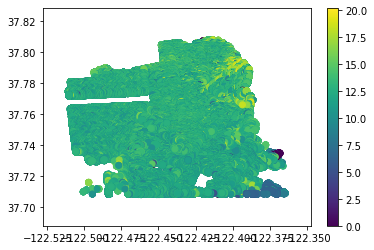

In [14]:
land_value = df['Assessed Land Value']
plt.scatter('latitude', 'longitude', data=df, c=np.log(land_value))
plt.colorbar()
'lat, lon backwards?'

In [15]:
df['Assessed Land Value'].describe()

count    2.238146e+06
mean     3.994016e+05
std      2.269509e+06
min      0.000000e+00
25%      5.093500e+04
50%      1.966560e+05
75%      4.119580e+05
max      5.835724e+08
Name: Assessed Land Value, dtype: float64

In [16]:
df['Closed Roll Year'].describe()

count    2.238146e+06
mean     2.012061e+03
std      3.164951e+00
min      2.007000e+03
25%      2.009000e+03
50%      2.012000e+03
75%      2.015000e+03
max      2.017000e+03
Name: Closed Roll Year, dtype: float64

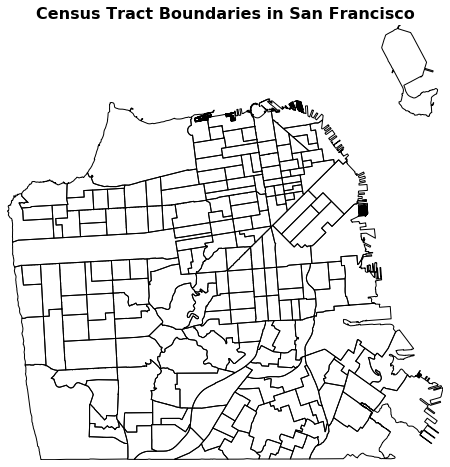

In [17]:
ax = gplt.polyplot(sftracts.geometry, projection = gcrs.LambertConformal(),
                   figsize=(12,8), edgecolor="k")
ax.set_title("Census Tract Boundaries in San Francisco", fontweight="bold", fontsize=16)
plt.show()

In [18]:
df_joined.columns

Index(['Closed Roll Year', 'Property Location', 'Parcel Number', 'Block',
       'Lot', 'Volume Number', 'Use Code', 'Use Definition',
       'Property Class Code', 'Property Class Code Definition',
       'Year Property Built', 'Number of Bathrooms', 'Number of Bedrooms',
       'Number of Rooms', 'Number of Stories', 'Number of Units',
       'Zoning Code', 'Construction Type', 'Lot Depth', 'Lot Frontage',
       'Property Area', 'Basement Area', 'Lot Area', 'Lot Code',
       'Tax Rate Area Code', 'Percent of Ownership', 'Exemption Code',
       'Exemption Code Definition', 'Status Code', 'Misc Exemption Value',
       'Homeowner Exemption Value', 'Current Sales Date',
       'Assessed Fixtures Value', 'Assessed Improvement Value',
       'Assessed Land Value', 'Assessed Personal Property Value',
       'Assessor Neighborhood District', 'Assessor Neighborhood Code',
       'Assessor Neighborhood', 'Supervisor District', 'Analysis Neighborhood',
       'the_geom', 'Row ID', 'latitude

In [20]:
# land_value_by_tract = gp.GeoDataFrame((df
#                                      .tractce10.value_counts()
#                                      .to_frame()
#                                      .rename(columns={"tractce10":"Incidents"})
#                                     ).merge(sftracts.geometry.to_frame(),
#                                             left_index=True, right_index=True)
#                                    )
# drug_inc_by_tract.head()

In [21]:
df_groupby_nhood = df_joined.groupby(by='Analysis Neighborhood').mean()

In [22]:
df_groupby_nhood.head()

,Closed Roll Year,Volume Number,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,Number of Units,Lot Depth,Lot Frontage,...,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,Assessor Neighborhood District,Supervisor District,latitude,longitude,shape_area,shape_len
Analysis Neighborhood,,,,,,,,,,,,,,,,,,,,,
Bayview Hunters Point,2012.124666,30.646635,1954.393609,1.545634,0.891812,5.170626,1.025843,0.974543,5.149371,0.066138,...,3493.098299,1.997956e+05,210321.900736,1067.712318,9.973025,10.000000,-122.392407,37.729500,1.222970e+07,19200.056535
Bernal Heights,2012.018163,33.873737,1928.697692,1.622283,0.963739,6.130958,1.421408,1.214290,24.966979,0.125787,...,871.533120,1.992513e+05,233652.512622,718.568362,8.958734,8.960462,-122.415691,37.740517,5.287533e+06,11550.864136
Castro/Upper Market,2012.083478,21.047826,1928.370819,2.324171,0.909271,8.479299,1.715128,1.823466,6.554793,0.094287,...,1964.275594,3.394652e+05,421168.964318,511.733848,4.998844,8.000000,-122.435972,37.762216,4.324510e+06,9369.261744
Chinatown,2012.022899,1.987515,1934.773760,4.622873,0.496798,16.416650,2.618345,4.305841,12.836795,0.037001,...,31000.078595,1.284832e+06,985226.604890,13829.734588,8.000000,3.000000,-122.407802,37.795972,1.872589e+06,6212.548051
Excelsior,2012.003633,36.699027,1936.746711,1.529839,0.731971,6.078586,1.167947,1.104523,7.447592,0.047164,...,3568.002639,1.514524e+05,179837.110060,307.559760,9.999886,10.784144,-122.431899,37.719039,4.983466e+06,10834.835073


In [23]:
# convert coords to points
df_groupby_nhood["Coordinates"] = (df_groupby_nhood[["latitude", "longitude"]]
                               .apply(tuple, axis=1)
                               .apply(Point)
                              ) 
# convert dataframe to geodataframe
df_groupby_nhood = gp.GeoDataFrame(df_groupby_nhood, geometry="Coordinates")

In [24]:

df_joined.crs = sftracts.crs # Making sure the map projections of both geodataframes are the same
drug_inc_by_tract = gp.sjoin(df_joined, sftracts) # joining the geodataframes on its spatial geometries
drug_inc_by_tract.rename(columns={"index_right":"tractce10"}, inplace=True)
drug_inc_by_tract.iloc[:,::-1].head()

,shape_len_right,shape_area_right,nhood_right,geoid_right,tractce10,shape_len_left,shape_area_left,nhood_left,geoid_left,tractce10,...,Property Class Code Definition,Property Class Code,Use Definition,Use Code,Volume Number,Lot,Block,Parcel Number,Property Location,Closed Roll Year
0,26864.752027,1.797075e+07,Financial District/South Beach,06075061500,061500,26864.752027,1.797075e+07,Financial District/South Beach,06075061500,061500,...,Condominium,Z,Single Family Residential,SRES,25,412,3774,3774412,0000 0200 BRANNAN ST0436,2007.0
6,26864.752027,1.797075e+07,Financial District/South Beach,06075061500,061500,26864.752027,1.797075e+07,Financial District/South Beach,06075061500,061500,...,Condominium,Z,Single Family Residential,SRES,25,136,3722,3722136,0000 0199 NEW MONTGOMERY ST0601,2015.0
15,26864.752027,1.797075e+07,Financial District/South Beach,06075061500,061500,26864.752027,1.797075e+07,Financial District/South Beach,06075061500,061500,...,Condominium,Z,Single Family Residential,SRES,25,049,3771,3771049,0000 0501 BEALE ST0009B,2016.0
17,26864.752027,1.797075e+07,Financial District/South Beach,06075061500,061500,26864.752027,1.797075e+07,Financial District/South Beach,06075061500,061500,...,Condominium,Z,Single Family Residential,SRES,25,566,3750,3750566,0000 0077 DOW PL0904,2010.0
30,26864.752027,1.797075e+07,Financial District/South Beach,06075061500,061500,26864.752027,1.797075e+07,Financial District/South Beach,06075061500,061500,...,Condominium,Z,Single Family Residential,SRES,25,213,3748,3748213,0000 0355 1ST STS601,2012.0


In [25]:
drug_inc_by_tract.head()

,Closed Roll Year,Property Location,Parcel Number,Block,Lot,Volume Number,Use Code,Use Definition,Property Class Code,Property Class Code Definition,...,tractce10,geoid_left,nhood_left,shape_area_left,shape_len_left,tractce10,geoid_right,nhood_right,shape_area_right,shape_len_right
0,2007.0,0000 0200 BRANNAN ST0436,3774412,3774,412,25,SRES,Single Family Residential,Z,Condominium,...,061500,06075061500,Financial District/South Beach,1.797075e+07,26864.752027,061500,06075061500,Financial District/South Beach,1.797075e+07,26864.752027
6,2015.0,0000 0199 NEW MONTGOMERY ST0601,3722136,3722,136,25,SRES,Single Family Residential,Z,Condominium,...,061500,06075061500,Financial District/South Beach,1.797075e+07,26864.752027,061500,06075061500,Financial District/South Beach,1.797075e+07,26864.752027
15,2016.0,0000 0501 BEALE ST0009B,3771049,3771,049,25,SRES,Single Family Residential,Z,Condominium,...,061500,06075061500,Financial District/South Beach,1.797075e+07,26864.752027,061500,06075061500,Financial District/South Beach,1.797075e+07,26864.752027
17,2010.0,0000 0077 DOW PL0904,3750566,3750,566,25,SRES,Single Family Residential,Z,Condominium,...,061500,06075061500,Financial District/South Beach,1.797075e+07,26864.752027,061500,06075061500,Financial District/South Beach,1.797075e+07,26864.752027
30,2012.0,0000 0355 1ST STS601,3748213,3748,213,25,SRES,Single Family Residential,Z,Condominium,...,061500,06075061500,Financial District/South Beach,1.797075e+07,26864.752027,061500,06075061500,Financial District/South Beach,1.797075e+07,26864.752027


In [ ]:
# I think This block should be the answer, but it never finishes running
"""

ax = gplt.choropleth(drug_inc_by_tract, projection=gcrs.LambertConformal(), hue="Assessed Land Value",
                     cmap="coolwarm", k=None, linewidth=0, figsize=(10,8), legend=True)
gplt.polyplot(sftracts.geometry, projection = gcrs.LambertConformal(), edgecolor="k",
              linewidth=1, ax=ax)
ax.set_title("Mean Assesed Land Value by Tract",
             fontweight="bold", fontsize=16)
plt.show()

"""

In [ ]:
drug_inc_by_tract = gp.GeoDataFrame((df_joined
                                    ).merge(sftracts.geometry.to_frame(),
                                            left_index=True, right_index=True)
                                   )
drug_inc_by_tract.head()


In [ ]:
# 
df_groupby_nhood.crs = sftracts.crs # Making sure the map projections of both geodataframes are the same
df_agg_tract = gp.sjoin(df_groupby_nhood, sftracts) # joining the geodataframes on its spatial geometries
df_agg_tract.rename(columns={"index_right":"tractce10"}, inplace=True)
df_agg_tract.iloc[:,::-1].head()
df_agg_tract.head()



In [ ]:
df_agg_tract['Assessed Land Value'].hist()

In [ ]:


ax = gplt.choropleth(df_agg_tract, projection=gcrs.LambertConformal(), hue="Assessed Land Value",
                     cmap="coolwarm", k=None, linewidth=0, figsize=(10,8), legend=True)
gplt.polyplot(sftracts.geometry, projection = gcrs.LambertConformal(), edgecolor="k",
              linewidth=1, ax=ax)
ax.set_title("Mean Assesed Land Value by Tract",
             fontweight="bold", fontsize=16)
plt.show()

